# SQL MINI PROJECT

#### **Business Question** : 

Create and classified customer membership level, based on their total spending amount and their order intensities.

#### **Objective** :

For the next campaign preparation, we decided to create membership for customers, based on how much they spend shopping each year. With assumption, the more they spend the higher their loyalty levels, and based on first assumption, we also need to see average order done by customer for each levels.

For now, we planned on four levels of membership, from bottom to top, **Bronze**, **Silver**, **Gold** and **Platinum**, that has different criteria based on their total spend all this time. This membership program can help us more focus to create the perfect marketing steps for each customers.

First, we will try to firgure it out how to assigned each customers to each level of membership. Usually, the highest level of membership spend way much more than others. So, we divided it based on their total order.

## Import Package

In [ ]:
import psycopg2
import pandas as pd



In [ ]:
!pip install --upgrade 'sqlalchemy<2.0'

In [ ]:
from sqlalchemy import create_engine

## Dataset

In [ ]:
# Show table from schema

q='''
  
  select table_name
    from information_schema.tables
    where table_schema = 'public'

'''

df = pd.read_sql(q,engine_postgresql)
df

,table_name
0,pg_stat_statements
1,dim_geography
2,dim_customer
3,dim_product
4,dim_territory
5,fact_sales


In [ ]:
# show column in table = dim_geography
# This table contain geographic information

q='''
  
  select *
  from dim_geography

'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,geography_id,city,state_province_code,state_province_name,country_region_code,english_country_region_name,postal_code
0,2,Coffs Harbour,NSW,New South Wales,AU,Australia,2450
1,3,Darlinghurst,NSW,New South Wales,AU,Australia,2010
2,4,Goulburn,NSW,New South Wales,AU,Australia,2580
3,5,Lane Cove,NSW,New South Wales,AU,Australia,1597
4,6,Lavender Bay,NSW,New South Wales,AU,Australia,2060


In [ ]:
# show column in table = dim_customer
# This table contain customer information

q='''
  
  select *
  from dim_customer

'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,customer_id,geography_id,customer_name,birthdate,maritalstatus,gender,datefirstpurchase,age,grouping_age
0,11013,543,Ian Jenkins,1988-08-06,M,M,2018-10-15,34,Group 21 - 40
1,11014,634,Sydney Bennett,1988-05-09,S,F,2018-09-24,34,Group 21 - 40
2,11015,301,Chloe Young,1999-02-27,S,F,2018-07-22,23,Group 21 - 40
3,11016,329,Wyatt Hill,1999-04-28,M,M,2018-08-13,23,Group 21 - 40
4,11017,39,Shannon Wang,1964-06-26,S,F,2016-07-15,58,Group 41 - 60


In [ ]:
# show column in table = dim_product
# This table contain product information

q='''
  
  select *
  from dim_product

'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,product_id,product_name,model_name,size_range,color,cost,normal_price,sub_category,category,disc
0,210,"HL Road Frame - Black, 58",HL Road Frame,54-58 CM,Black,11000.0,11000.0,Road Frames,Components,20
1,211,"HL Road Frame - Red, 58",HL Road Frame,54-58 CM,Red,11000.0,11000.0,Road Frames,Components,20
2,480,Patch Kit/8 Patches,Patch kit,NA,NA,11991.0,32060.0,Tires and Tubes,Accessories,20
3,529,Road Tire Tube,Road Tire Tube,NA,NA,20892.0,55860.0,Tires and Tubes,Accessories,20
4,477,Water Bottle - 30 oz.,Water Bottle,NA,NA,26128.0,69860.0,Bottles and Cages,Accessories,20


In [ ]:
# show column in table = dim_territory
# This table contain territory information

q='''
  
  select *
  from dim_territory

'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,territory_id,region,country,groups
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


In [ ]:
# show column in table = fact_sales
# This table contain product sales information

q='''
  
  select *
  from fact_sales

'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,order_detail_id,order_date,product_id,customer_id,territory_id,sales_order_number,sales_order_line_number,quantity,unitprice_rupiah,totalprice_rupiah,totalcost_rupiah,shippingprice_rupiah,omset
0,SO43698-1,2016-07-01,346,28389.0,7,SO43698,1,1,47599860.0,47599860.0,26770162.0,1189997.0,20829698.0
1,SO43704-1,2016-07-02,351,11005.0,9,SO43704,1,1,47249860.0,47249860.0,26573322.0,1181247.0,20676538.0
2,SO43705-1,2016-07-02,344,11011.0,9,SO43705,1,1,47599860.0,47599860.0,26770162.0,1189997.0,20829698.0
3,SO43713-1,2016-07-05,310,27601.0,4,SO43713,1,1,50095780.0,50095780.0,30398120.0,1252395.0,19697660.0
4,SO43714-1,2016-07-05,311,13591.0,10,SO43714,1,1,50095780.0,50095780.0,30398120.0,1252395.0,19697660.0


## Entity Relationship Diagram

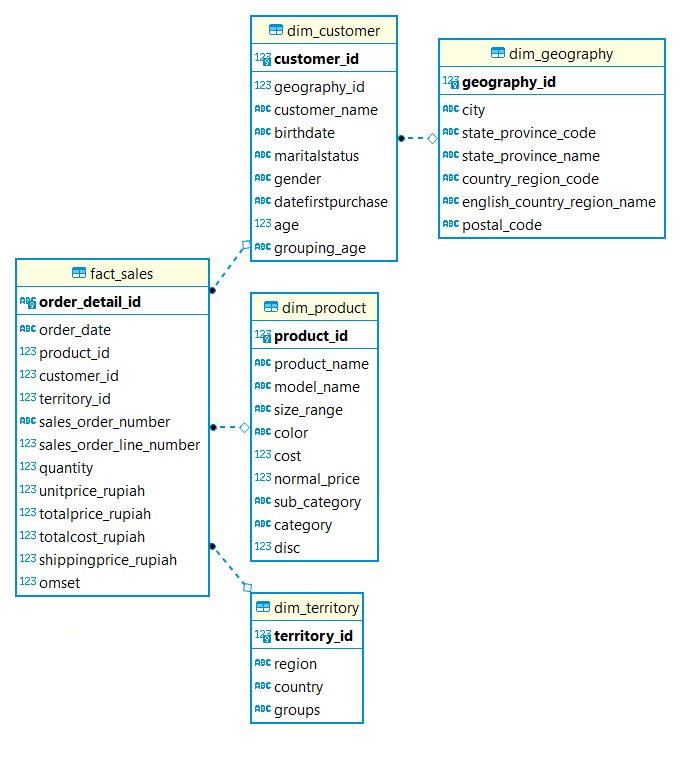

Entity Relationship Diagram or ER Diagram, help us to configure the relationship between model, or in this case between table.

Based on above **ER Diagram**, each table has different primary key that mostly refers to foreign key in **fact_sales**. Except for **dim_geography** that only connect with foreign key in **dim_customer**.

<br>
<br>

**PRIMARY KEY** :


1.   fact_sales = `order_detail_id`
2.   dim_customer = `customer_id`
3.   dim_product = `product_id`
4.   dim_territory = `territory_id`
5.   dim_geography = `geography_id`



## Query

In [ ]:
q=''' 
    with temp_total as(
      select customer_id, 
      totalprice_rupiah,
      sum(totalprice_rupiah) as total_spend

      from fact_sales
      group by 1, 2

    ),

    temp_level as(
    
    select customer_id,
    total_spend,

       case 
       when sum(totalprice_rupiah) <= (0.25 * total_spend) then 'Bronze'
       when sum(totalprice_rupiah) > (0.25 * total_spend) and sum(totalprice_rupiah) <= (0.5 * total_spend) then 'Silver'
       when sum(totalprice_rupiah) > (0.5 * total_spend) and sum(totalprice_rupiah) <= (0.75 * total_spend) then 'Gold'
       else 'Platinum'
       end as spend_level

    from temp_total
    group by 1, 2

    ),

    temp_order as(
    select customer_id,
    spend_level,
    sales_order_number,

    case
    when spend_level = 'Bronze' then count(sales_order_number)
    when spend_level = 'Silver' then count(sales_order_number)
    when spend_level = 'Gold' then count(sales_order_number)
    else count(distinct sales_order_number)
    end as TotaL_Order

    from temp_level
    left join fact_sales using(customer_id)
    group by 1, 2, 3

    )

    select
    spend_level,
    case
    when spend_level = 'Bronze' then count(distinct customer_id)
    when spend_level = 'Silver' then count(distinct customer_id) 
    when spend_level = 'Gold' then count(distinct customer_id)
    else count(distinct customer_id)
    end as Total_Customer,
    case
    when spend_level = 'Bronze' then avg(Total_Order)
    when spend_level = 'Silver' then avg(Total_Order)
    when spend_level = 'Gold' then avg(Total_Order)
    else avg(Total_Order)
    end as Average_Order

    from temp_order
    group by 1
    order by 2

'''

df = pd.read_sql(q,engine_postgresql)
df

,spend_level,total_customer,average_order
0,Bronze,25,5.740385
1,Silver,216,6.412766
2,Platinum,1357,0.999650


### Conclusion:

Based on above query, we get result that ideally the membership levels, divided into 3 levels, **Bronze**, **Silver**, and **Platinum**. From those 3 levels, dominated by the highest level of membership or **Platinum**, followed by **Silver Level** and lastly **Bronze**

Although **Platinum** has the highest amount of members, but averagely they only do one massive transaction, and then gone. It is a serious problem, consider this type of customer, had no issue spending large sum of money in one single transaction. We need to change this type of customer from a one time buyer to a regular buyer.

We can try to increase their transaction for next campaign with some marketing steps. Start with offering them a special perks and exclusive sneak peek for the newest product, just before the campaign. And actively give information and discount for additional merchandise and spareparts.



---

Thank you for reading my Mini SQL Project!


I eagerly wait for any input or opinion regarding this project, don’t hesitate to contact me via email | amalia.wulandiari@gmail.com, or just visit my [LinkedIn Profile!](https://www.linkedin.com/in/laksmiamalia/)